# **Cat Detector**

## **Elahe Khodaverdi - Fereshte Bagheri**

## **Description**  

In this this project we implement a system for detecting cat faces in images using the Haar Cascade classifier. We process individual images or a batch of images from a specified directory, annotating detected faces with bounding boxes and labels. The processed images are saved to an output folder, and the results can be visualized using Matplotlib.

## **Requirements**  

* **Libraries**: OpenCV, NumPy, Matplotlib, OS, Glob  
* **File Structure**:  
  - Input images stored in `images/`  
  - Haar Cascade model stored in `models/`  
  - Output images stored in `outputImages/`  


## **Outputs**  

### **Expected Outputs**  

1. **Images**:  
   - Input images annotated with detected cat faces.  
   - Visualizations of processed results, showing bounding boxes and labels for detected cats.  

### **Sample Outputs**  

The processed images, with annotations for detected cat faces, are saved in the `outputImages/` directory.  


## **Algorithm Details**  

1. **Load Image**  
    - The script reads images from the `images/` folder.  
    - Converts the image from BGR to RGB color space for visualization using Matplotlib.  


2. **Detect Cat Faces**  
    - Loads the model from the `models/` directory.  
    - Converts the image to grayscale and uses the `detectMultiScale` method to identify cat faces.  
    - Annotates each detected cat face with a bounding box and label (e.g., "Cat #1").  

3. **Save and Display Results**  
    - Saves the annotated images in the `outputImages/` directory.  
    - Displays the original and annotated images using Matplotlib.  



# Requirements

In [69]:
import cv2
import os
import matplotlib.pyplot as plt

# Loading Image

In [70]:
# Define the path to the image file using os.path.join for cross-platform compatibility
image_address = os.path.join("images", "image.webp")

# Define the path to the Haar Cascade model file using os.path.join for cross-platform compatibility
model = os.path.join("models", "haarcascade_frontalcatface_extended.xml")

# Read the input image from the specified path
image = cv2.imread(image_address)

# Convert the image from BGR to RGB format (as OpenCV uses BGR by default and Matplotlib uses RGB)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)


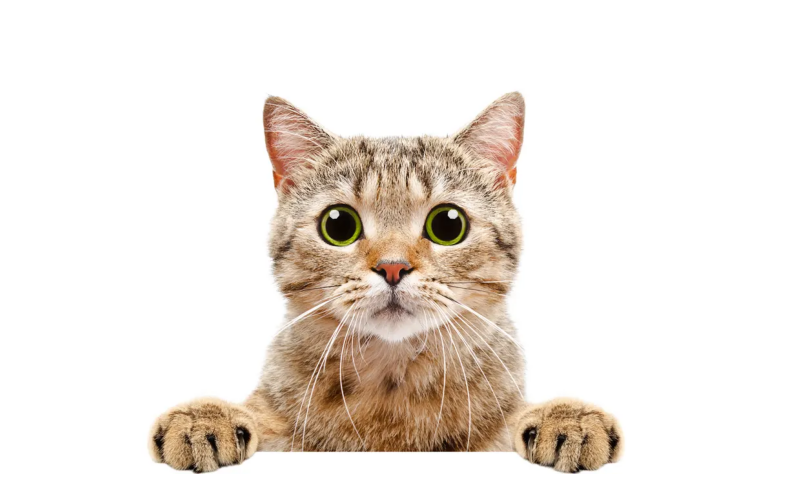

In [71]:
# Create a figure with specified size to display the image
plt.figure(figsize=(10, 8))

# Display the image using Matplotlib
plt.imshow(image)

# Turn off the axis for a cleaner look
plt.axis('off')

# Show the figure
plt.show()

# Detecting Cat

In [72]:
# Load the Haar Cascade model for cat face detection
detector = cv2.CascadeClassifier(model)

# Detect cat faces in the image using the loaded model
# scaleFactor: Parameter specifying how much the image size is reduced at each image scale
# minNeighbors: Parameter specifying how many neighbors each candidate rectangle should have to retain it
# minSize: Minimum possible object size. Objects smaller than this are ignored.
rects = detector.detectMultiScale(cv2.cvtColor(image, cv2.COLOR_RGB2GRAY), scaleFactor=1.02, minNeighbors=2, minSize=(180, 180))

# Iterate over the detected rectangles (bounding boxes for cat faces)
for (i, (x, y, w, h)) in enumerate(rects):
    # Draw a rectangle around the detected cat face
    # Annotate the image with the text 'Cat #N' above the rectangle
    cv2.rectangle(image, (x, y), (x + w, y + h), (255, 0, 0), 2)
    cv2.putText(image, f'Cat #{i+1}', (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255, 0, 0), 2, cv2.LINE_AA)

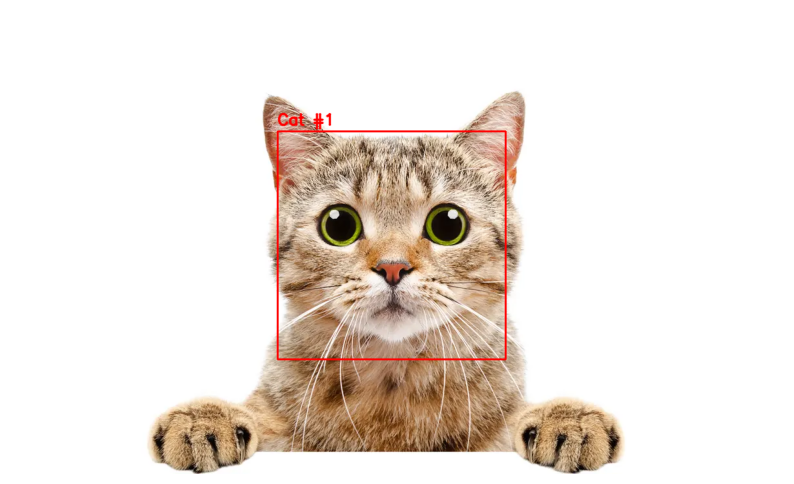

In [73]:
# Create a figure with specified size to display the image
plt.figure(figsize=(10, 8))

# Display the image with detected cat faces and annotations
plt.imshow(image)


# Turn off the axis for a cleaner look
plt.axis('off')

# Show the figure
plt.show()


In [74]:
def display_images_from_dict(images_dict, num_columns=3, size=5):
    titles = list(images_dict.keys())
    images = list(images_dict.values())
    num_rows = (len(images) + num_columns - 1) // num_columns 

    plt.figure(figsize=(size * num_columns, size * num_rows))

    for index, (title, image) in enumerate(zip(titles, images)):
        plt.subplot(num_rows, num_columns, index + 1)
        cmap = 'gray' if len(image.shape) == 2 else None
        plt.imshow(image, cmap=cmap)

        plt.title(title, fontsize=8)
        plt.axis('off')

    plt.subplots_adjust(hspace=0.5, wspace=0.5)
    plt.tight_layout(pad=0.1)
    plt.show()


In [75]:
import numpy as np
import glob
def detectCat(image):
    detector = cv2.CascadeClassifier(model)
    imageCopy = np.copy(image)
    rects = detector.detectMultiScale(cv2.cvtColor(imageCopy, cv2.COLOR_RGB2GRAY), scaleFactor=1.02, minNeighbors=2, minSize=(180, 180))

    for (i, (x, y, w, h)) in enumerate(rects):
        cv2.rectangle(imageCopy, (x, y), (x + w, y + h), (0, 255, 0), 2)
        cv2.putText(imageCopy, f'Cat #{i+1}', (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0,255, 0), 2, cv2.LINE_AA)
    return imageCopy

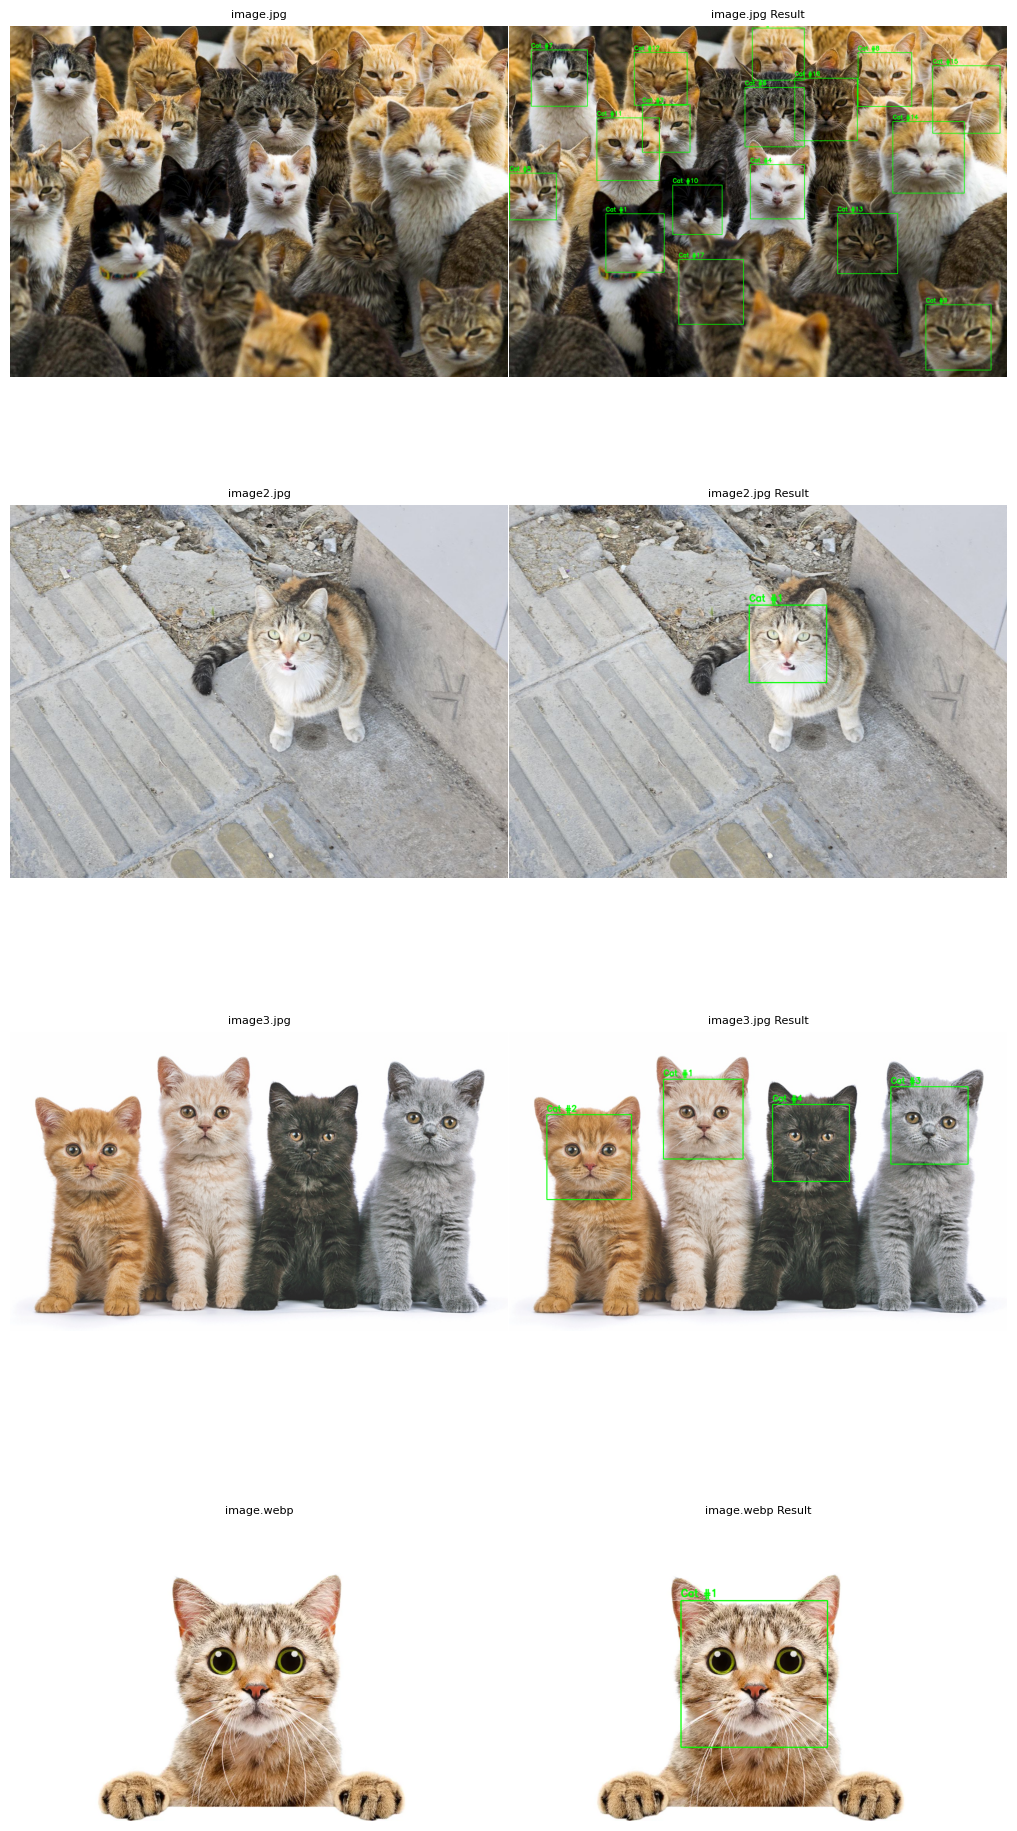

In [76]:
images_dict = {}
def apply_cat_detection_to_image(image_path, images_dict):
    image = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    result = detectCat(image_rgb)
    filename = os.path.basename(image_path)
    output_path = os.path.join(OUTPUT_FOLDER, "detected_" + filename)
    result_bgr = cv2.cvtColor(result, cv2.COLOR_RGB2BGR)
    images_dict[filename] = image_rgb
    images_dict[filename + " Result"] = result
    cv2.imwrite(output_path, result_bgr)

OUTPUT_FOLDER = "outputImages"
if not os.path.exists(OUTPUT_FOLDER):
    os.makedirs(OUTPUT_FOLDER)
image_files = glob.glob(os.path.join("images", "*.[jp][pn]g")) + glob.glob(os.path.join("images", "*.jpeg")) + glob.glob(os.path.join("images", "*.webp"))


for image_path in image_files:
    apply_cat_detection_to_image(image_path, images_dict)

display_images_from_dict(images_dict,2)